In [36]:
import numpy as np
from bandits import MultiArmedBandit

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick

# from multiprocessing import Pool

In [37]:
mpl.rcParams['figure.dpi'] = 300

In [38]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
mab = MultiArmedBandit(k = 10)

time_horizon = 2000
number_of_experiments = 200

greedy = mab.average_behavior(N = number_of_experiments, T = time_horizon, epsilon = 0)
metrics2 = mab.average_behavior(N = number_of_experiments, T = time_horizon, epsilon = 0.01)
metrics1 = mab.average_behavior(N = number_of_experiments, T = time_horizon, epsilon = 0.1)
ucb = mab.average_behavior(N = number_of_experiments, T = time_horizon, strategy = 'UCB')

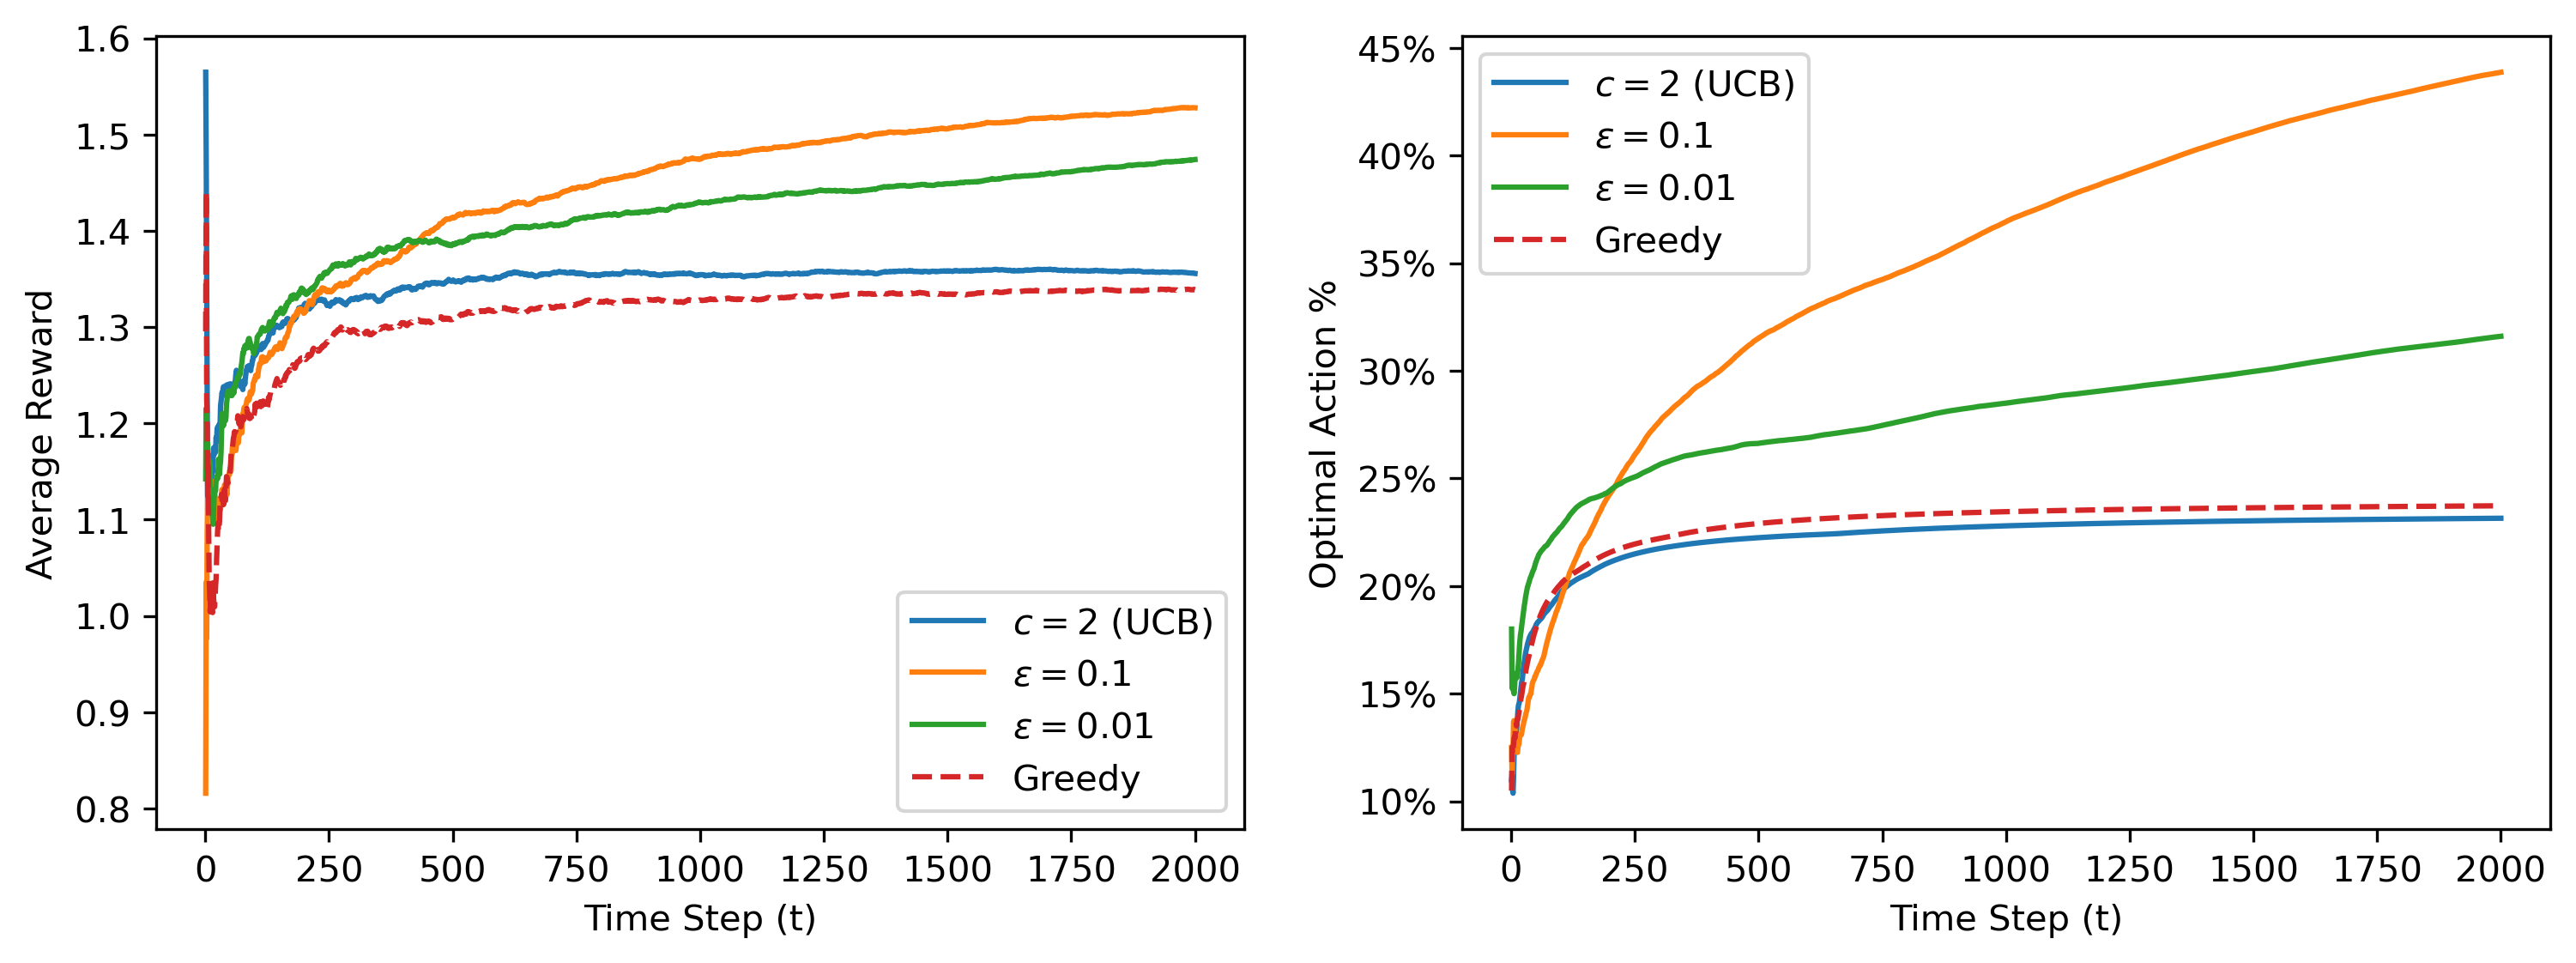

In [43]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(12,4))

ax1.plot(range(1,time_horizon+1), ucb['average_reward'], label='$c=2$ (UCB)')
ax1.plot(range(1,time_horizon+1), metrics1['average_reward'], label='$\epsilon=0.1$')
ax1.plot(range(1,time_horizon+1), metrics2['average_reward'], label='$\epsilon=0.01$')
ax1.plot(range(1,time_horizon+1), greedy['average_reward'], linestyle = '--', label='Greedy')
ax1.set_ylabel('Average Reward')
ax1.set_xlabel('Time Step (t)')

ax2.plot(range(1,time_horizon+1), ucb['optimal_action'], label='$c=2$ (UCB)')
ax2.plot(range(1,time_horizon+1), metrics1['optimal_action'], label='$\epsilon=0.1$')
ax2.plot(range(1,time_horizon+1), metrics2['optimal_action'], label='$\epsilon=0.01$')
ax2.plot(range(1,time_horizon+1), greedy['optimal_action'], linestyle = '--', label='Greedy')
ax2.set_ylabel('Optimal Action %')
ax2.set_xlabel('Time Step (t)')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))

ax1.legend()
ax2.legend()
plt.show()

In [44]:
mab.actual_distribution_parameters

{0: {'loc': 1.7806182318244699, 'scale': 3.770580644888225},
 1: {'loc': 1.212179144052894, 'scale': 4.5751813787923865},
 2: {'loc': 0.1557038539976232, 'scale': 4.788631679980849},
 3: {'loc': 1.87570896776761, 'scale': 3.6830373725805825},
 4: {'loc': 1.4809711469776077, 'scale': 3.8547055912641603},
 5: {'loc': 0.9936528634701267, 'scale': 4.390771309572305},
 6: {'loc': 1.3223078845738339, 'scale': 2.269958974442649},
 7: {'loc': 0.46402464657709974, 'scale': 2.436878539601043},
 8: {'loc': 0.9460770385773314, 'scale': 2.673560704227955},
 9: {'loc': -0.18730655887546765, 'scale': 4.601485628819656}}

In [45]:
mab.estimated_values, np.argmax(mab.estimated_values)

(array([-2.24565035, -0.02167227,  1.09050558,  1.93183647, -2.79054183,
         0.06091691,  0.45962272, -0.30252674,  0.14039624, -3.65459184]),
 3)